In [1]:
import pandas as pd
import glob
lista=[]
for filename in glob.iglob('20*.csv'):
    df=pd.read_csv(filename)
    df["year"]=filename.split('.')[0]+"-12-31"
    lista.append(df)
    
todos=pd.concat(lista)

In [2]:
todos['Country']=todos.Country.str.replace('[^a-zA-Z]', '')

In [3]:
pd.set_option('display.max_rows', None)


In [4]:
todos[todos['Country']=="Belarus"]

,Draw,Country,Artist,Song,Language(s),year,Language,Place,Points
0,1,Belarus,Арина Пехтерева,Пришельцы,"Russian, English",2020-12-31,NaN,NaN,NaN
6,7,Belarus,Liza Misnikova,Pepelny,NaN,2019-12-31,"Russian, English",11.0,92.0
7,8,Belarus,Daniel Yastremski,Time,NaN,2018-12-31,"Russian, English",11.0,114.0
7,9,Belarus,Alexander Minyonok,Musyka moikh pobed,NaN,2016-12-31,"Russian, English",7.0,177.0
4,5,Belarus,Helena Meraai,I Am the One,NaN,2017-12-31,Russian,5.0,149.0


In [5]:
countries=list(set(todos['Country']))

In [6]:
# Python
import pandas as pd
from fbprophet import Prophet


def forecast_country(country:str,years_into_future:int):
    subset=todos[todos['Country']==country].dropna(axis=0,subset=['Points'])[['year','Points']]
    subset=subset.rename(columns={"year":'ds','Points':'y'})
    subset['ds']=pd.to_datetime(subset['ds'])
    subset.reset_index(inplace=True)
    df = subset
    if df.shape[0] < 3:
        raise Exception('insufficient data')
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=years_into_future,freq='y')
    forecast = m.predict(future)
    display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    fig1 = m.plot(forecast)


# Malta

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


,ds,yhat,yhat_lower,yhat_upper
0,2017-12-31,144.403356,84.604605,207.637671
1,2018-12-31,105.752592,39.793731,169.040021
2,2019-12-31,66.825458,4.067580,131.016012
3,2020-12-31,42.881452,-26.446741,105.442615


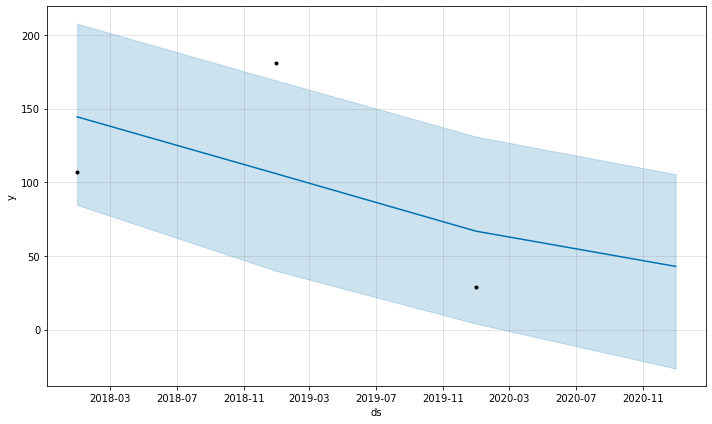

In [7]:
forecast_country(country='Malta',years_into_future=1)

# Rusia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
9,2025-12-31,-138.138735,-152.186903,-123.795541
10,2026-12-31,-183.686215,-197.922060,-170.476962
11,2027-12-31,-231.377270,-245.873018,-217.802985
12,2028-12-31,-248.728877,-262.505349,-234.840335
13,2029-12-31,-292.123943,-305.932564,-277.865927


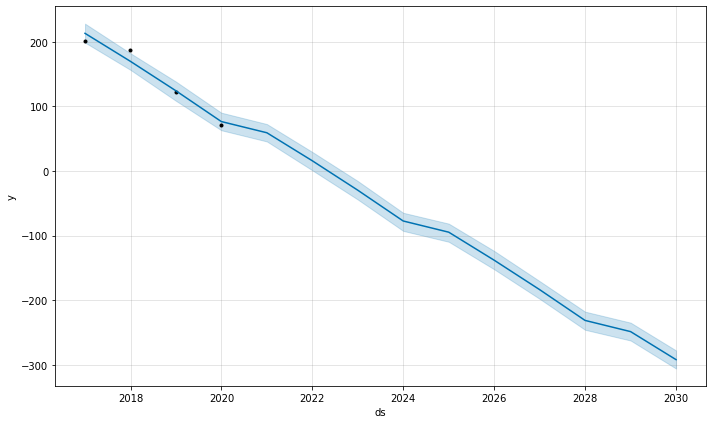

In [9]:
forecast_country(country='Russia',years_into_future=10)

# Ucrania

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
0,2016-12-31,86.274913,12.925733,161.721594
1,2017-12-31,98.901420,28.901235,167.711342
2,2018-12-31,111.021329,43.250911,187.023493
3,2019-12-31,122.630825,51.096761,188.536090
4,2020-12-31,122.264527,43.910580,192.021054


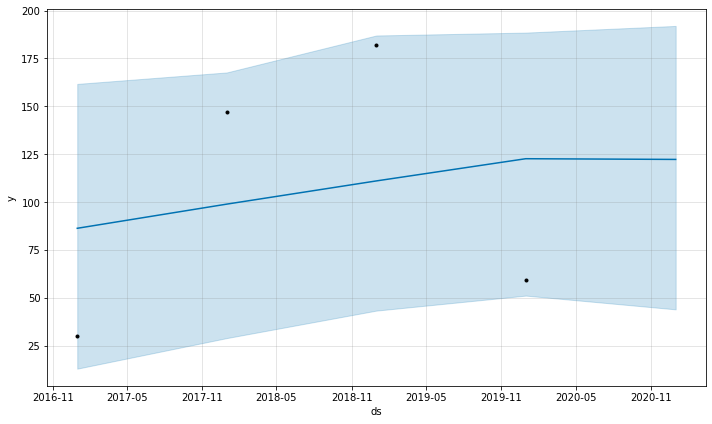

In [10]:
forecast_country(country='Ukraine',years_into_future=1)

# Serbia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
0,2016-12-31,27.936258,-12.192244,67.961706
1,2017-12-31,50.158340,10.940452,88.073928
2,2018-12-31,72.361614,33.935526,111.067746
3,2019-12-31,94.540799,54.624700,135.427014
4,2020-12-31,99.317223,58.289096,138.460828


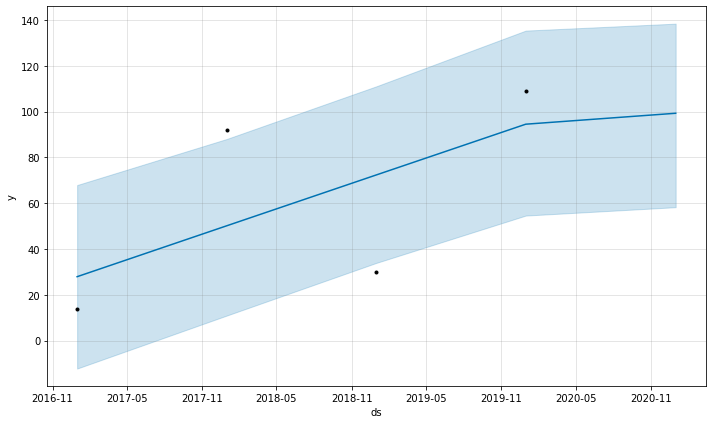

In [11]:
forecast_country(country='Serbia',years_into_future=1)

# Holanda

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
0,2016-12-31,156.294394,114.441698,200.871177
1,2017-12-31,152.951288,109.890692,195.834511
2,2018-12-31,150.066804,104.097542,193.537394
3,2019-12-31,147.643188,102.926805,193.561002
4,2020-12-31,151.958842,106.421461,194.926065


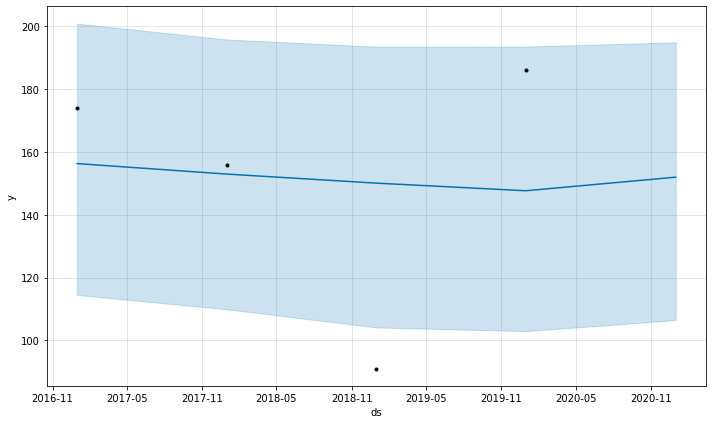

In [12]:
forecast_country(country='Netherlands',years_into_future=1)

# Francia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


,ds,yhat,yhat_lower,yhat_upper
0,2004-12-31,78.00000,78.00000,78.00000
1,2018-12-31,203.00000,203.00000,203.00000
2,2019-12-31,169.00000,169.00000,169.00000
3,2020-12-31,334.21123,334.21123,334.21123


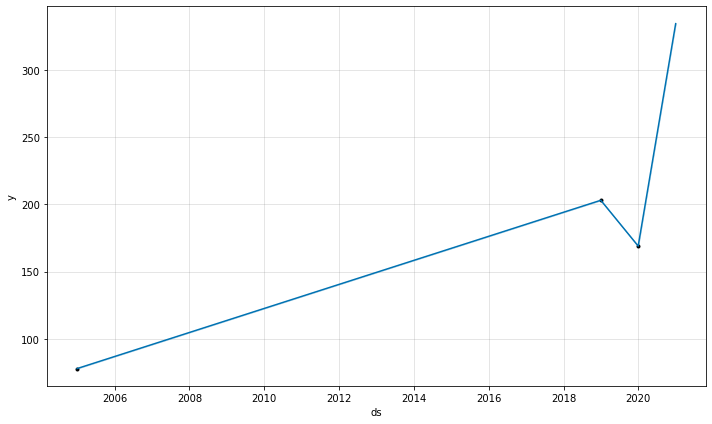

In [58]:
forecast_country(country='France',years_into_future=1)

# Polonia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


,ds,yhat,yhat_lower,yhat_upper
0,2016-12-31,60.000000,60.00000,60.000000
1,2017-12-31,138.000000,138.00000,138.000000
2,2018-12-31,215.000000,215.00000,215.000000
3,2019-12-31,278.000000,278.00000,278.000000
4,2020-12-31,479.615875,476.90351,482.656484


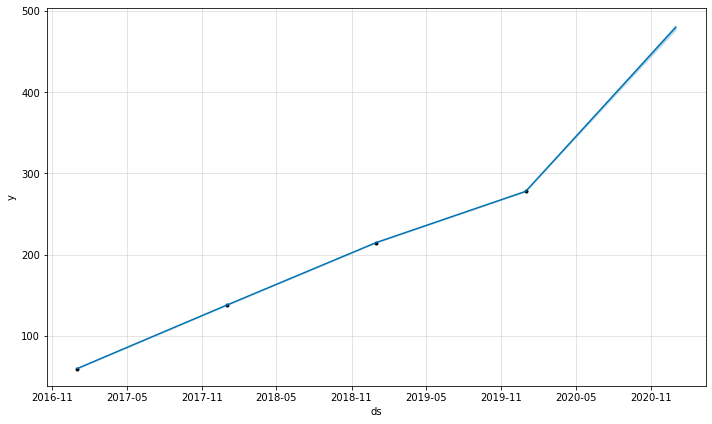

In [13]:
forecast_country(country='Poland',years_into_future=1)

# Bielorrusia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


,ds,yhat,yhat_lower,yhat_upper
5,2016-12-31,145.956351,112.448846,179.217764
6,2017-12-31,134.887553,102.453955,165.964837
7,2018-12-31,123.798334,91.733154,157.160796
8,2019-12-31,112.713546,79.113689,144.054205
9,2020-12-31,183.068137,152.431586,216.218121


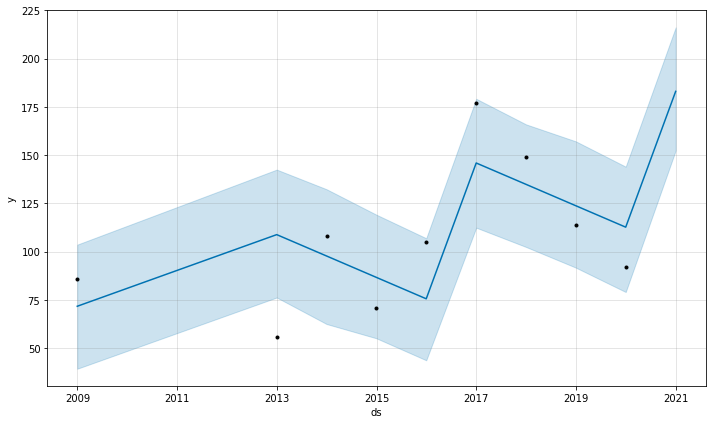

In [48]:
forecast_country(country='Belarus',years_into_future=1)

# España

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds,yhat,yhat_lower,yhat_upper
1,2004-12-31,155.988364,124.243493,184.862941
2,2005-12-31,145.369953,114.754949,178.145784
3,2006-12-31,135.969580,105.615068,167.720783
4,2019-12-31,204.345443,174.496080,235.815508
5,2020-12-31,258.040210,228.419966,288.490662


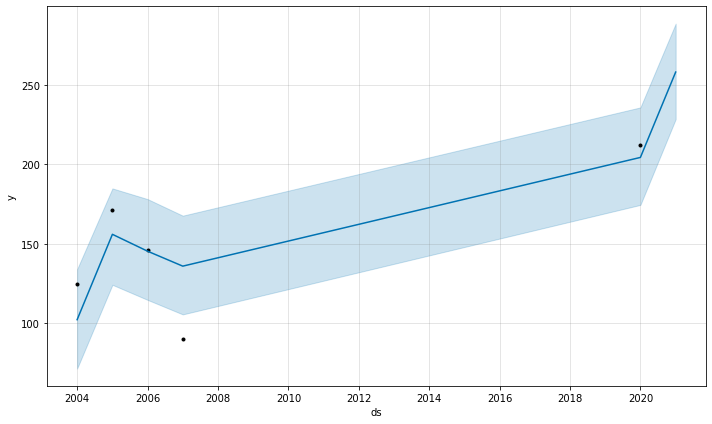

In [49]:
forecast_country(country='Spain',years_into_future=1)

# Alemania

In [50]:
forecast_country(country='Germany',years_into_future=1)

Exception: insufficient data

# Georgia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.


,ds,yhat,yhat_lower,yhat_upper
9,2016-12-31,164.698630,113.673923,217.495187
10,2017-12-31,141.503356,90.134035,197.603600
11,2018-12-31,118.939455,63.056236,171.757819
12,2019-12-31,97.037826,37.118546,150.141193
13,2020-12-31,176.130868,121.256880,227.124136


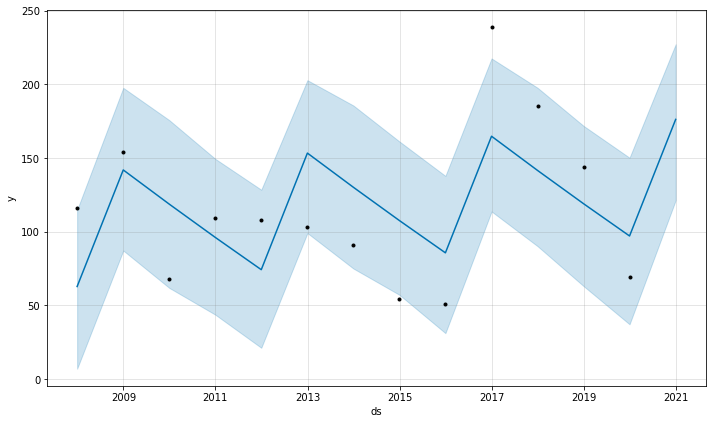

In [51]:
forecast_country(country='Georgia',years_into_future=1)

# Kazajistán

In [53]:
forecast_country(country='Kazakhstan',years_into_future=1)

Exception: insufficient data

In [64]:
pd.read_clipboard()

,Pais,Serie de Tiempo,Categoría,Score,Prediction
0,España,258,Buena,0.7742,357.87180
1,Bielorrusia,183,Buena,0.5387,232.29105
2,Polonia,157,Mala,0.5529,200.40265
3,Holanda,151,Buena,0.7665,208.87075
4,Rusia,149,Mala,0.5233,187.98585
